In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# IMPORTING ALL THE NECCESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# IMPORTING DATASET
THE TRAIN DATASET IS THE COMBINATION OF REST OF THE TWO DATASETS(TEST,GENDER)

In [3]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# DROPING UNWANTED DATA

In [5]:
df.drop(['Name','Ticket','Fare'],axis=1,inplace=True)

# FILLING MISSING VALUES

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.replace('-','nan')
df.replace('na','nan')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,NaN,S
887,888,1,1,female,19.0,0,0,B42,S
888,889,0,3,female,NaN,1,2,NaN,S
889,890,1,1,male,26.0,0,0,C148,C


In [8]:
df['Age'].mean()

29.69911764705882

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [11]:
df.drop(['Cabin'],axis=1,inplace=True)

# FINDING SKEWNESS 

In [12]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
dtype: float64

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


In [14]:
q1=df['SibSp'].quantile(0.25)
q2=df['SibSp'].quantile(0.75)
q1


0.0

In [15]:
q2

1.0

In [16]:
df['SibSp']=np.where(df['SibSp']<q1,q1,df['SibSp'])
df['SibSp']=np.where(df['SibSp']>q2,q2,df['SibSp'])
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          0.784821
Parch          2.749117
dtype: float64

In [17]:
df['Parch']=np.sqrt(df['Parch'])
df['Parch'].skew()

1.5297990732860154

# CONVERTING CATEGORICAL DATA INTO NUMERIC DATASET

In [18]:
dummies=pd.get_dummies(df['Sex'])
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [19]:
df=pd.concat([df,dummies],axis='columns')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,female,male
0,1,0,3,male,22.0,1.0,0.0,S,0,1
1,2,1,1,female,38.0,1.0,0.0,C,1,0
2,3,1,3,female,26.0,0.0,0.0,S,1,0
3,4,1,1,female,35.0,1.0,0.0,S,1,0
4,5,0,3,male,35.0,0.0,0.0,S,0,1


In [20]:
df.drop(['Sex','female'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,male
0,1,0,3,22.0,1.0,0.0,S,1
1,2,1,1,38.0,1.0,0.0,C,0
2,3,1,3,26.0,0.0,0.0,S,0
3,4,1,1,35.0,1.0,0.0,S,0
4,5,0,3,35.0,0.0,0.0,S,1


In [21]:
dummies1=pd.get_dummies(df['Embarked'])
dummies1.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
df=pd.concat([df,dummies1],axis='columns')
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,male,C,Q,S
0,1,0,3,22.0,1.0,0.0,S,1,0,0,1
1,2,1,1,38.0,1.0,0.0,C,0,1,0,0
2,3,1,3,26.0,0.0,0.0,S,0,0,0,1
3,4,1,1,35.0,1.0,0.0,S,0,0,0,1
4,5,0,3,35.0,0.0,0.0,S,1,0,0,1


In [23]:
df.drop(['Embarked'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,C,Q,S
0,1,0,3,22.0,1.0,0.0,1,0,0,1
1,2,1,1,38.0,1.0,0.0,0,1,0,0
2,3,1,3,26.0,0.0,0.0,0,0,0,1
3,4,1,1,35.0,1.0,0.0,0,0,0,1
4,5,0,3,35.0,0.0,0.0,1,0,0,1


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

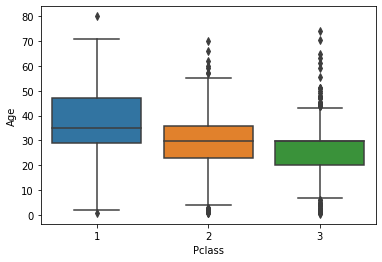

In [24]:
sns.boxplot(x='Pclass',y='Age',data=df)

# UNIVARATE ANALYSIS

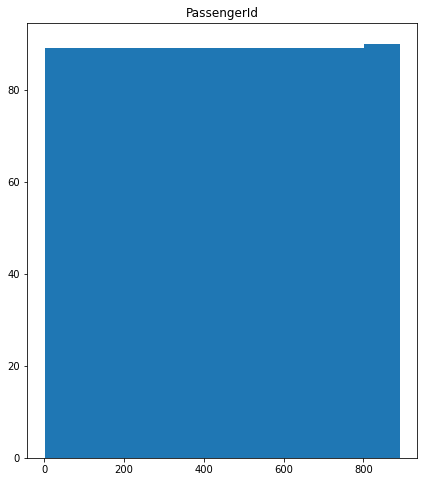

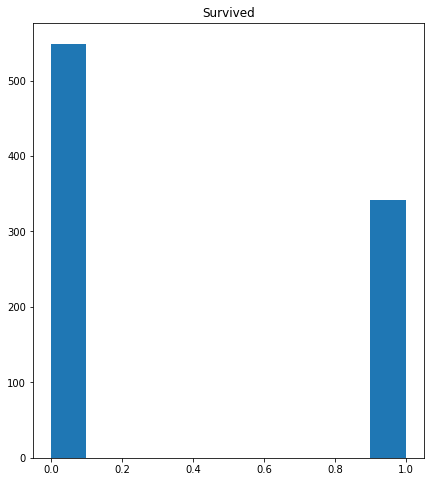

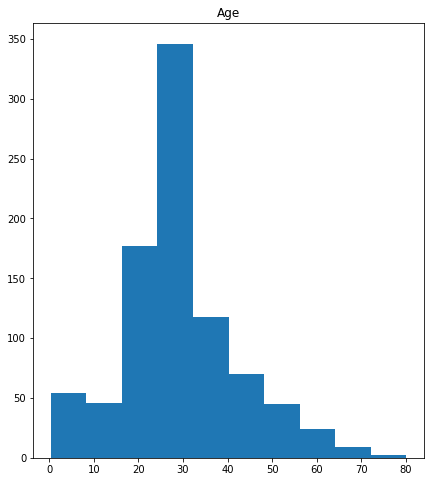

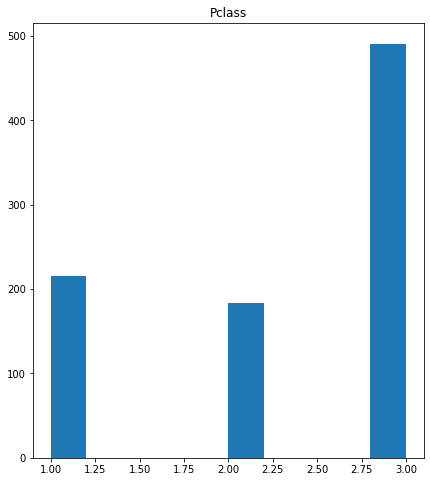

In [25]:
numeric=['PassengerId','Survived', 'Age','Pclass']
for column in numeric:
    plt.figure(figsize=(7,8))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

# CORRELATION

In [26]:
cor=df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.053397,0.000348,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.115867,0.121652,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.076009,-0.006792,0.131900,-0.243292,0.221009,0.074053
Age,0.033207,-0.069809,-0.331339,1.000000,-0.148409,-0.237261,0.084153,0.032024,-0.013855,-0.019336
SibSp,-0.053397,0.115867,-0.076009,-0.148409,1.000000,0.404346,-0.203203,0.034759,-0.055398,0.004412
Parch,0.000348,0.121652,-0.006792,-0.237261,0.404346,1.000000,-0.257096,0.011815,-0.095097,0.049494
male,0.042939,-0.543351,0.131900,0.084153,-0.203203,-0.257096,1.000000,-0.082853,-0.074115,0.119224
C,-0.001205,0.168240,-0.243292,0.032024,0.034759,0.011815,-0.082853,1.000000,-0.148258,-0.782742
Q,-0.033606,0.003650,0.221009,-0.013855,-0.055398,-0.095097,-0.074115,-0.148258,1.000000,-0.499421
S,0.022204,-0.149683,0.074053,-0.019336,0.004412,0.049494,0.119224,-0.782742,-0.499421,1.000000


In [27]:
x_df=df.iloc[:,2:]
y_df=df.Survived

In [28]:
x_df

,Pclass,Age,SibSp,Parch,male,C,Q,S
0,3,22.000000,1.0,0.000000,1,0,0,1
1,1,38.000000,1.0,0.000000,0,1,0,0
2,3,26.000000,0.0,0.000000,0,0,0,1
3,1,35.000000,1.0,0.000000,0,0,0,1
4,3,35.000000,0.0,0.000000,1,0,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0.0,0.000000,1,0,0,1
887,1,19.000000,0.0,0.000000,0,0,0,1
888,3,29.699118,1.0,1.414214,0,0,0,1
889,1,26.000000,0.0,0.000000,1,1,0,0


In [29]:
y_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_df,y_df)

LogisticRegression()

In [31]:
x_df

,Pclass,Age,SibSp,Parch,male,C,Q,S
0,3,22.000000,1.0,0.000000,1,0,0,1
1,1,38.000000,1.0,0.000000,0,1,0,0
2,3,26.000000,0.0,0.000000,0,0,0,1
3,1,35.000000,1.0,0.000000,0,0,0,1
4,3,35.000000,0.0,0.000000,1,0,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0.0,0.000000,1,0,0,1
887,1,19.000000,0.0,0.000000,0,0,0,1
888,3,29.699118,1.0,1.414214,0,0,0,1
889,1,26.000000,0.0,0.000000,1,1,0,0


In [32]:
y_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [33]:
y_predict=model.predict(x_df)
y_predict

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [34]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_df, y_predict))

Accuracy :  0.8058361391694725


In [35]:
data=pd.DataFrame(y_predict,columns=['survived'])

In [36]:
data2=pd.DataFrame(df.PassengerId)

In [37]:
result=pd.concat([data2,data],axis=1)
result

,PassengerId,survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [38]:
result.to_csv('kaggle_titanic.csv',index=False)